In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import os

import tensorflow as tf
import numpy as np

# Set the seed for random operations. 
SEED = 1234
tf.random.set_seed(SEED)  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cwd = os.getcwd()

In [ ]:
!unzip '/content/drive/My Drive/Homeworks/Homework2/Datasets/Development_Dataset'

In [ ]:
#Script that change Roseau images extension from png to jpg
from PIL import Image
import shutil

plant_list = ['Haricot', 'Mais']

for plant in plant_list:
  images_path = '/content/Development_Dataset/Training/Roseau/' + plant + '/Images/'
  file_names = os.listdir(images_path)
  
  for file_name in file_names:
    no_extension_name = file_name[:-4]
    image = Image.open(images_path + file_name)
    image.save(images_path + no_extension_name + '.jpg')
    os.remove(images_path + file_name)

  images_path = '/content/Development_Dataset/Test_Dev/Roseau/' + plant + '/Images/'
  file_names = os.listdir(images_path)
  
  for file_name in file_names:
    no_extension_name = file_name[:-4]
    image = Image.open(images_path + file_name)
    image.save(images_path + no_extension_name + '.jpg')
    os.remove(images_path + file_name)

In [ ]:
# ImageDataGenerator
# ------------------

from tensorflow.keras.preprocessing.image import ImageDataGenerator

apply_data_augmentation = True

# Create training ImageDataGenerator object
# We need two different generators for images and corresponding masks
if apply_data_augmentation:
    img_data_gen = ImageDataGenerator(rotation_range=0.3,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      zoom_range=0.5,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      fill_mode='reflect')
    mask_data_gen = ImageDataGenerator(rotation_range=0.3,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      zoom_range=0.5,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      fill_mode='reflect')

In [ ]:
#Modified script from challenge starting_kit
def read_rgb_mask(img_path, out_shape):
    '''
    img_path: path to the mask file
    Returns the numpy array containing target values
    '''

    mask_img = Image.open(img_path)

    return read_rgb_mask_from_array(mask_img, out_shape)

#This variant, used with tiling procedure, read directly the image numpy array
def read_rgb_mask_from_array(mask_arr, out_shape):
    '''
    mask_arr: the numpy array of mask image
    Returns the numpy array containing target values
    '''

    new_mask_arr = np.zeros(mask_arr.shape[:2], dtype=mask_arr.dtype)

    # Use RGB dictionary in 'RGBtoTarget.txt' to convert RGB to target
    new_mask_arr[np.where(np.all(mask_arr == [254, 124, 18], axis=-1))] = 0
    new_mask_arr[np.where(np.all(mask_arr == [255, 255, 255], axis=-1))] = 1
    new_mask_arr[np.where(np.all(mask_arr == [216, 67, 82], axis=-1))] = 2

    return new_mask_arr

In [ ]:
# Script to group all the image from team_list and plant_list in a new path, for both Training and Test_Dev
team_list = ['Bipbip', 'Roseau', 'Pead', 'Weedelec'] # 'Bipbip', 'Pead', 'Roseau', 'Weedelec'
plant_list = ['Haricot', 'Mais']

groupped_images = os.path.join(cwd, 'Groupped_Images')
if not os.path.exists(groupped_images):
    os.makedirs(groupped_images)

groupped_training = os.path.join(groupped_images, 'Training')
if not os.path.exists(groupped_training):
    os.makedirs(groupped_training)
    os.makedirs(os.path.join(groupped_training, 'Images'))
    os.makedirs(os.path.join(groupped_training, 'Masks'))

groupped_test_dev = os.path.join(groupped_images, 'Test_Dev')
if not os.path.exists(groupped_test_dev):
    os.makedirs(groupped_test_dev)
    os.makedirs(os.path.join(groupped_test_dev, 'Images'))


for team in team_list:
  for plant in plant_list:
    source_dir = '/content/Development_Dataset/Training/' + team + '/' + plant + '/Images'  
    target_dir = '/content/Groupped_Images/Training/Images'
    
    file_names = os.listdir(source_dir)
    for file_name in file_names:
      shutil.copy(os.path.join(source_dir, file_name), target_dir)
      
    source_dir = '/content/Development_Dataset/Training/' + team + '/' + plant + '/Masks'  
    target_dir = '/content/Groupped_Images/Training/Masks'
    
    file_names = os.listdir(source_dir)
    
    for file_name in file_names:
      shutil.copy(os.path.join(source_dir, file_name), target_dir)


    source_dir = '/content/Development_Dataset/Test_Dev/' + team + '/' + plant + '/Images'  
    target_dir = '/content/Groupped_Images/Test_Dev/Images'
    
    file_names = os.listdir(source_dir)
    for file_name in file_names:
      shutil.copy(os.path.join(source_dir, file_name), target_dir)

      

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

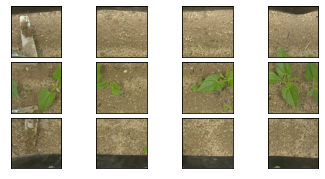

In [ ]:
#For tiling procedure visualization
import math
import matplotlib.pyplot as plt
img = Image.open(os.path.join(cwd,'Groupped_Images/Training/Images/Bipbip_haricot_im_00871.jpg'))
mask= Image.open(os.path.join(cwd,'Groupped_Images/Training/Masks/Bipbip_haricot_im_00871.png'))

img_w = 512
img_h = 512
original_img_w, original_img_h = img.size

tiles = tf.image.extract_patches(images=np.expand_dims(np.asarray(img),0),
                           sizes=[1, img_w, img_h, 1],
                           strides=[1, img_h, img_w, 1],
                           rates=[1, 1, 1, 1],
                           padding='SAME')


tiles = tf.reshape(tiles, [tiles.shape[1]*tiles.shape[2]*tiles.shape[3]//(img_w*img_h*3),img_h,img_w,3], )




mask_tiles = tf.image.extract_patches(images= np.expand_dims(np.asarray(mask),0),
                           sizes=[1, img_w, img_h, 1],
                           strides=[1, img_h, img_w, 1],
                           rates=[1, 1, 1, 1],
                           padding='SAME')
mask_tiles = tf.reshape(mask_tiles, [mask_tiles.shape[1]*mask_tiles.shape[2]*mask_tiles.shape[3]//(img_w*img_h*3),img_h,img_w,3])


fig, ax = plt.subplots(1, 3)
plt.subplots_adjust(wspace=.1, hspace=.1)


for index, image in enumerate(tiles):
    ax[0] = plt.subplot(4, 4, index + 1)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[0].imshow(image)
plt.show()

  

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

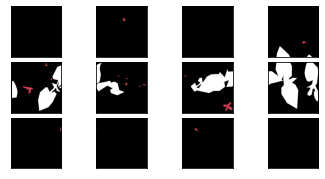

In [ ]:
#Visualize the extracted mask patches
fig, ax = plt.subplots(1, 3)
plt.subplots_adjust(wspace=.1, hspace=.1)


for index, image in enumerate(mask_tiles):
    ax[2] = plt.subplot(4, 4, index + 1)
    ax[2].set_xticks([])
    ax[2].set_yticks([])
    ax[2].imshow(image)
plt.show()

In [ ]:
#This is the CustomDataset class used to generate Test and Validation sets. Is inspired by the one seen during lab.
#Some modification were made in order to process each image and extract patches from it.
#This implementation prepare the patches before training, reducing processing time but increasing memory usage
from PIL import Image
import gc

class CustomDataset(tf.keras.utils.Sequence):

  """
    CustomDataset inheriting from tf.keras.utils.Sequence.

    3 main methods:
      - __init__: save dataset params like directory, filenames..
      - __len__: return the total number of samples in the dataset
      - __getitem__: return a sample from the dataset

    Note: 
      - the custom dataset return a single sample from the dataset. Then, we use 
        a tf.data.Dataset object to group samples into batches.

  """

  def __init__(self, dataset_dir, which_subset, out_shape = [256,256], img_generator=None, mask_generator=None, 
               preprocessing_function=None):
    
    images = os.listdir(os.path.join(dataset_dir, 'Images'))
    img_h = out_shape[0]
    img_w = out_shape[1]
    #Shuffle the images order
    import random
    random.seed(SEED)
    images = os.listdir(os.path.join(dataset_dir, 'Images'))
    random.shuffle(images)
    #Split the whole set in training (80%) and validation (20%)
    splitted_images = np.array_split(images,[round(len(images)*0.8)])
    train_images = splitted_images[0]
    valid_images = splitted_images[1]
    if which_subset == 'training':
      lines = train_images
    elif which_subset == 'validation':
      lines = valid_images


    img_tiles_array = []
    mask_tiles_array = []
    subset_filenames = []

    self.which_subset = which_subset
    self.dataset_dir = dataset_dir
    self.subset_filenames = subset_filenames
    self.img_generator = img_generator
    self.mask_generator = mask_generator
    self.preprocessing_function = preprocessing_function
    self.out_shape = out_shape  

    for line in lines:
      line = line.strip('.jpg')
      subset_filenames.append(line)   
      img = Image.open(os.path.join(self.dataset_dir, 'Images', line + '.jpg'))
      mask= Image.open(os.path.join(self.dataset_dir, 'Masks', line + '.png'))
      original_img_w, original_img_h = img.size

      tiles = tf.image.extract_patches(images=np.expand_dims(np.asarray(img),0),
                           sizes=[1, img_w, img_h, 1],
                           strides=[1, img_w, img_h, 1],
                           rates=[1, 1, 1, 1],
                           padding='SAME')
      tiles = tf.reshape(tiles, [tiles.shape[1]*tiles.shape[2]*tiles.shape[3]//(img_w*img_h*3),img_h,img_w,3], )

      

      mask_tiles = tf.image.extract_patches(images= np.expand_dims(np.asarray(mask),0),
                           sizes=[1, img_w, img_h, 1],
                           strides=[1, img_w, img_h, 1],
                           rates=[1, 1, 1, 1],
                           padding='SAME')
      mask_tiles = tf.reshape(mask_tiles, [mask_tiles.shape[1]*mask_tiles.shape[2]*mask_tiles.shape[3]//(img_w*img_h*3),img_h,img_w,3])

      for index, image in enumerate(tiles):
        img_tiles_array.append(image)
      for index, mask_img in enumerate(mask_tiles):
        mask_tiles_array.append(mask_img)
      gc.collect()
      
      
    

    self.img_tiles_array = img_tiles_array
    self.mask_tiles_array = mask_tiles_array
    gc.collect()
    tf.keras.backend.clear_session()

  def __len__(self):
    return len(self.img_tiles_array)

  def __getitem__(self, index):
    # Read Image
    img = self.img_tiles_array[index]
    mask = self.mask_tiles_array[index]

    img_arr = np.array(img)
    ##
    mask_arr = read_rgb_mask_from_array(np.array(mask), out_shape=self.out_shape)
    ##


    mask_arr = np.expand_dims(mask_arr, -1)

    if self.which_subset == 'training':
      if self.img_generator is not None and self.mask_generator is not None:
       # Perform data augmentation
       #In this version, is used only one generator to get the transform, then applyied as descripted below
        transform = self.img_generator.get_random_transform(img_arr.shape)
        img_arr = self.img_generator.apply_transform(img_arr, transform)
        # ImageDataGenerator use bilinear interpolation for augmenting the images.
        # Thus, when applied to the masks it will output 'interpolated classes', which
        # is an unwanted behaviour. As a trick, we can transform each class mask 
        # separately and then we can cast to integer values.
        # Finally, we merge the augmented binary masks to obtain the final segmentation mask.
        
        out_mask = np.zeros_like(mask_arr)
        for c in np.unique(mask_arr):
          if c > 0:
            curr_class_arr = np.float32(mask_arr == c)
            curr_class_arr = self.mask_generator.apply_transform(curr_class_arr, transform)
            # from [0, 1] to {0, 1}
            curr_class_arr = np.uint8(curr_class_arr)
            # recover original class
            curr_class_arr = curr_class_arr * c 
            out_mask += curr_class_arr
    else:
      out_mask = mask_arr
    
    if self.preprocessing_function is not None:
      img_arr = self.preprocessing_function(img_arr)

    return img_arr, np.float32(out_mask)

In [ ]:
#This cell install and use an external library to create differente segmentation models.
#This models were used at the end of the challange in order to compare our results with other state-of-the-art models.
#The implementation that gives better results was a UNet with a EfficentNetB3 encoder
%env SM_FRAMEWORK=tf.keras
! pip install -U segmentation-models
import segmentation_models as sm
BACKBONE = 'efficientnetb3'
preprocess = sm.get_preprocessing(BACKBONE)
model = sm.Unet(BACKBONE, encoder_weights='imagenet', classes = 3, activation = 'softmax')
model.summary()

'''
  Yakubovskiy:2019,
  Author = {Pavel Yakubovskiy},
  Title = {Segmentation Models},
  Year = {2019},
  Publisher = {GitHub},
  Journal = {GitHub repository},
  Howpublished = https://github.com/qubvel/segmentation_models

'''


In [ ]:
#Create the training and validation generators
from tensorflow.keras.applications.vgg16 import preprocess_input 
train_dataset_dir = os.path.join(cwd, 'Groupped_Images/Training')

gc.collect()
preprocess = preprocess
#preprocess = tf.keras.applications.vgg16.preprocess_input
#preprocess = None
dataset = CustomDataset(train_dataset_dir, 'training', 
                        img_generator=img_data_gen, mask_generator=mask_data_gen,
                        preprocessing_function=preprocess, out_shape=[512,512])
dataset_valid = CustomDataset(train_dataset_dir, 'validation', 
                              preprocessing_function=preprocess, out_shape=[512,512])

In [ ]:
#Create Training and Validation datasets
batch_size = 8
img_h = 512
img_w = 512
train_dataset = tf.data.Dataset.from_generator(lambda: dataset,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([img_h, img_w, 3], [img_h, img_w, 1]))

train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.repeat()

valid_dataset = tf.data.Dataset.from_generator(lambda: dataset_valid,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([img_h, img_w, 3], [img_h, img_w, 1]))
valid_dataset = valid_dataset.batch(batch_size)

valid_dataset = valid_dataset.repeat()


In [ ]:
# Let's test data generator
# -------------------------
import time
from matplotlib import cm
import matplotlib.pyplot as plt

%matplotlib inline

# Assign a color to each class
evenly_spaced_interval = np.linspace(0, 1, 20)
colors = [cm.rainbow(x) for x in evenly_spaced_interval]


iterator = iter(train_dataset)

[0. 1. 2.]


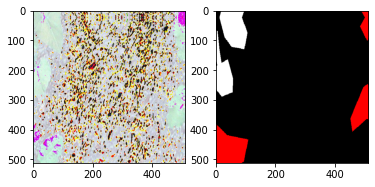

In [ ]:


# Assign a color to each class
colors_dict = {}
colors_dict[2] = [255, 0, 0]  # weed
colors_dict[1] = [255, 255, 255]  # crop
colors_dict[0] = [0, 0, 0]  # background 


fig, ax = plt.subplots(1, 2)
augmented_img, target = next(iterator)
augmented_img = augmented_img[0]   # First element
augmented_img = augmented_img  # denormalize
target = np.array(target[0, ..., 0])   # First element (squeezing channel dimension)

print(np.unique(target))

target_img = np.zeros([target.shape[0], target.shape[1], 3])

target_img[np.where(target == 0)] = [0, 0, 0]
for i in range(1, 3):
  target_img[np.where(target == i)] = colors_dict[i]

ax[0].imshow(np.uint8(augmented_img))
ax[1].imshow(np.uint8(target_img))

plt.show()

In [ ]:
#Custom UNet, same as FirstVersion notebook but use 512x512 input patches
from tensorflow.keras import layers
def get_model(img_size, num_classes):
    inputs = tf.keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###


    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = tf.keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
tf.keras.backend.clear_session()

# Build model
img_h = 512
img_w = 512
model = get_model((img_h,img_w), 3)
model.summary()

In [ ]:
#This is the main UNet that was used for our experiments.
#It is composed of a VGG encoder, a 5 levels decoder with skip connections
from keras.layers import Conv2D, Conv2DTranspose, concatenate
from keras import Model

from keras.applications.vgg16 import VGG16
img_h = 512
img_w = 512
base_pretrained_model = VGG16(input_shape =  (img_h,img_w, 3), include_top = False, weights = 'imagenet')
base_pretrained_model.summary()
inp = base_pretrained_model.input
output_vgg16_conv = base_pretrained_model.output
fine_tuning = True
if fine_tuning:
  for layer in base_pretrained_model.layers:
    if ('conv3' in layer.name or 'conv2' in layer.name):
      layer.trainable = True
    else:
      layer.trainable = False
else:
  for layer in base_pretrained_model.layers:
    layer.trainable = False


# output and start upsampling
conv_1  = Conv2D(512, (3,3), activation='relu', padding='same')(output_vgg16_conv)
up_conv = Conv2DTranspose(256, (3,3), strides=(2,2), activation='relu', padding='same')(conv_1)

# first concatenation block
concat_1 = concatenate([base_pretrained_model.get_layer('block5_conv3').output, up_conv], axis=-1, name='concat_1')
conv_2 = Conv2D(512, (3,3), activation='relu', padding='same')(concat_1)
up_conv_2 = Conv2DTranspose(256, (3,3), strides=(2,2), activation='relu', padding='same')(conv_2)

# second concatenation block
concat_2 = concatenate([up_conv_2, base_pretrained_model.get_layer('block4_conv3').output])
conv_3 = Conv2D(512, (3,3), activation='relu', padding='same')(concat_2)
up_conv_3 = Conv2DTranspose(128, (3,3), strides=(2,2), activation='relu', padding='same')(conv_3)

# third concatenation block
concat_3 = concatenate([up_conv_3, base_pretrained_model.get_layer('block3_conv3').output])
conv_4 = Conv2D(256, (3,3), activation='relu', padding='same')(concat_3)
up_conv_4 = Conv2DTranspose(64, (3,3), strides=(2,2), activation='relu', padding='same')(conv_4)

# fourth concatenation block
concat_4 = concatenate([up_conv_4, base_pretrained_model.get_layer('block2_conv2').output])
conv_5 = Conv2D(128, (3,3), activation='relu', padding='same')(concat_4)
up_conv_5 = Conv2DTranspose(32, (3,3), strides=(2,2), activation='relu', padding='same')(conv_5)

# fifth concatenation block
concat_4 = concatenate([up_conv_5, base_pretrained_model.get_layer('block1_conv2').output])
conv_6 = Conv2D(128, (3,3), activation='sigmoid', padding='same')(concat_4)

# Add a per-pixel classification layer
outputs = Conv2D(3, 3, activation="softmax", padding="same")(conv_6)

finalModel = Model(inp, outputs = outputs)
model = finalModel
finalModel.summary()


In [ ]:
# Optimization params
# -------------------

#In order to reduce the classes unbalance, a weighted custom loss is implemented.
def meanIoU_loss(y_true, y_pred, weights):
    y_pred = tf.expand_dims(tf.argmax(y_pred, -1), -1)

    per_class_iou = []

    for i in range(0,3): 
      # Get prediction and target related to only a single class (i)
      class_pred = tf.cast(tf.where(y_pred == i, 1, 0), tf.float32)
      class_true = tf.cast(tf.where(y_true == i, 1, 0), tf.float32)
      intersection = tf.reduce_sum(class_true * class_pred)
      union = tf.reduce_sum(class_true) + tf.reduce_sum(class_pred) - intersection
    
      iou = (intersection + 1e-8) / (union + 1e-8)
      per_class_iou.append(iou)

    return (per_class_iou[0] * weights[0] + per_class_iou[1] * weights[1] + per_class_iou[2] * weights[2])/(weights[0]+weights[1]+weights[2])
#The weighted_loss compute the weighted mean IoU of each class and multiplies it for sparse categorical cross entropy
def weighted_loss(y_true, y_pred,  weights=[1,6,10]):
  return (1-meanIoU_loss(y_true,y_pred, weights))*tf.keras.losses.sparse_categorical_crossentropy(y_true,y_pred)


loss = weighted_loss
# learning rate
lr = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
# -------------------

# Here we define the intersection over union for each class in the batch.
# Then we compute the final iou as the mean over classes
def meanIoU(y_true, y_pred):
    # get predicted class from softmax
    y_pred = tf.expand_dims(tf.argmax(y_pred, -1), -1)

    per_class_iou = []

    for i in range(1,3): # exclude the background class 0
      # Get prediction and target related to only a single class (i)
      class_pred = tf.cast(tf.where(y_pred == i, 1, 0), tf.float32)
      class_true = tf.cast(tf.where(y_true == i, 1, 0), tf.float32)
      intersection = tf.reduce_sum(class_true * class_pred)
      union = tf.reduce_sum(class_true) + tf.reduce_sum(class_pred) - intersection
    
      iou = (intersection + 1e-7) / (union + 1e-7)
      per_class_iou.append(iou)

    return tf.reduce_mean(per_class_iou)

# A metric to check if plants and weeds are interpreted as background
def bg_over_something(y_true, y_pred):
    # get predicted class from softmax
    y_pred = tf.expand_dims(tf.argmax(y_pred, -1), -1)

    class_true_plant = tf.cast(tf.where(y_true == 1, 1, 0), tf.float32)
    class_true_weed = tf.cast(tf.where(y_true == 2, 1, 0), tf.float32)
    class_pred_bg = tf.cast(tf.where(y_pred == 0, 1, 0), tf.float32)

    class_true_no_bg = class_true_plant + class_true_weed

    intersection = tf.reduce_sum(class_true_no_bg * class_pred_bg)

    return (intersection + 1e-7) / (tf.reduce_sum(class_true_no_bg) + 1e-7)

# Validation metrics
# ------------------
metrics = ['accuracy', meanIoU, bg_over_something]
# ------------------

# Compile Model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)


In [ ]:
#Create model callbacks
import  os
from datetime import datetime

cwd = os.getcwd()

exps_dir = os.path.join(cwd, 'drive/My Drive/Homeworks/Homework2/Saved', 'multiclass_segmentation_experiments')
if not os.path.exists(exps_dir):
    os.makedirs(exps_dir)

now = datetime.now().strftime('%b%d_%H-%M-%S')

model_name = 'CNN_DataAug_UNet'

exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)
    
callbacks = []

# Model checkpoint
# ----------------
ckpt_dir = os.path.join(exp_dir, 'ckpts')
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)

ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp_{epoch:02d}.ckpt'), 
                                                   save_weights_only=True)  # False to save the model directly
callbacks.append(ckpt_callback)

# Visualize Learning on Tensorboard
# ---------------------------------
tb_dir = os.path.join(exp_dir, 'tb_logs')
if not os.path.exists(tb_dir):
    os.makedirs(tb_dir)
    
# By default shows losses and metrics for both training and validation
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir,
                                             profile_batch=0,
                                             histogram_freq=0)  # if 1 shows weights histograms
callbacks.append(tb_callback)

# Early Stopping
# --------------
early_stop = False
if early_stop:
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
    callbacks.append(es_callback)


# How to visualize Tensorboard

# 1. tensorboard --logdir EXPERIMENTS_DIR --port PORT     <- from terminal
# 2. localhost:PORT   <- in your browser

In [ ]:
#Load weights

load_weights = False

#loaded_weights = 'CNN_DataAug_Whole_Dec25_16-28-17/ckpts/cp_07.ckpt'
#loaded_weights = 'CNN_DataAug_UNet_Dec26_14-03-29/ckpts/cp_13.ckpt'
loaded_weights = 'CNN_DataAug_UNet_Dec27_10-47-54/ckpts/cp_01.ckpt'
if load_weights:
  model.load_weights('/content/drive/My Drive/Homeworks/Homework2/Saved/multiclass_segmentation_experiments/' + str(loaded_weights))

In [ ]:
#Train the model
model.fit(x=train_dataset,
          epochs=200,  #### set repeat in training dataset
          steps_per_epoch=len(dataset)//batch_size,
          validation_data=valid_dataset,
          validation_steps=len(dataset_valid)//batch_size, 
          callbacks=callbacks)

In [ ]:
#Functions from starting_kit to encode/decode predicted mask
import os
import json
import numpy as np
from PIL import Image
from datetime import datetime


def rle_decode(rle, shape):
    s = rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)


def rle_encode(img):
    '''
    img: numpy array, 1 - foreground, 0 - background
    Returns run length as string formatted
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]

    return ' '.join(str(x) for x in runs)

In [ ]:
#Auxiliary function that extract patches from an image
import gc
def get_img_tiles(img):
  '''
  img: an np array representing an image
  return img_tiles: an array containing the extracted patches 
  '''
  #original_img_w, original_img_h = img.size
  img_w = 512
  img_h = 512
  tiles = tf.image.extract_patches(images=np.expand_dims(np.asarray(img),0),
                        sizes=[1, img_w, img_h, 1],
                       strides=[1, img_w, img_h, 1],
                       rates=[1, 1, 1, 1],
                       padding='SAME')
  tiles = tf.reshape(tiles, [tiles.shape[1]*tiles.shape[2]*tiles.shape[3]//(img_w*img_h*3),img_h,img_w,3], )

  img_tiles = []
  for index, image in enumerate(tiles):
    img_tiles.append(image)
    
  gc.collect()
  return img_tiles
      

In [ ]:
#Testing start here->
#Create test generator and create the submitted json
#Predicting each mask patch extracted from each Test_Dev image and reconstruct the whole mask deleting the padding
from PIL import Image
from tensorflow.keras.applications.vgg16 import preprocess_input 
import math
test_dataset_dir = os.path.join(cwd, 'Groupped_Images/Test_Dev')
img_w = 512
img_h = 512
test_data_gen = ImageDataGenerator()
test_gen = test_data_gen.flow_from_directory(test_dataset_dir,
                                             color_mode='rgb',
                                             classes=['Images'],
                                             # don't generate labels
                                             class_mode=None,
                                             # don't shuffle
                                             shuffle=False,
                                             # use same size as in training
                                             target_size=(img_h, img_w),
                                             batch_size=1)


test_gen.reset()
img_names = []
img_shapes = []
images = []
for files in test_gen.filenames:
  img_names.append(files.strip('.jpg')[7:])
  img_shapes.append(Image.open(os.path.join(test_dataset_dir, files)).size)
  images.append(Image.open(os.path.join(test_dataset_dir, files)))


fname = 'results_'
fname += datetime.now().strftime('%b%d_%H-%M-%S') + '.json'
result_dir = os.path.join(cwd, 'drive/My Drive/Homeworks/Homework2')
submission_dict = {}

for img, img_name, shape  in zip(images, img_names, img_shapes):
  test_img_h = shape[1]
  test_img_w = shape[0]
  #img = img[0]
  team = ''
  crop = ''

  if 'Bipbip' in img_name:
    team = 'Bipbip'
  elif 'Pead' in img_name:
    team = 'Pead'
  elif 'Roseau' in img_name:
    team = 'Roseau'
  elif 'Weedelec' in img_name:
    team = 'Weedelec'
  
  if 'haricot' in img_name:
    crop = 'Haricot'
  elif 'mais' in img_name:
    crop = 'Mais'
  
  img_tiles = []
  predicted_tiles = []
  preprocessed_img = img = preprocess(np.asarray(img))

  img_tiles = get_img_tiles(preprocessed_img)

  #Here each patch is predicted
  for index, image in enumerate(img_tiles):
        
    out_sigmoid = model.predict(x=tf.expand_dims(image, 0))
  
    #out_sigmoid = tf.image.resize(out_sigmoid, [test_img_h,test_img_w], method='nearest')
  
    predicted_class = tf.argmax(out_sigmoid, -1)

    predicted_class = predicted_class[0, ...]
    predicted_tiles.append(predicted_class)
  #Mask is reconstructed
  rec_mask_pred = np.zeros (( math.ceil( test_img_h/512) * 512 , math.ceil( test_img_w /512 ) *512))
  rec_row = 0
  rec_col = 0

  for tile in predicted_tiles:
    rec_mask_pred[(rec_col*512):(rec_col+1)*512, (rec_row*512):(rec_row+1)*512] = tile
    if (test_img_w/512) <= (rec_row + 1):
      rec_row = 0
      rec_col += 1
    else:
      rec_row += 1

  vertical_border = (((math.ceil( test_img_h/512))) * 512 - test_img_h ) //2
  orizontal_border = (((math.ceil( test_img_w /512 ))) *512 - test_img_w ) //2

  rec_mask_pred= rec_mask_pred[vertical_border:test_img_h+vertical_border, orizontal_border:test_img_w+orizontal_border]

  # RLE encoding
  # crop
  rle_encoded_crop = rle_encode(rec_mask_pred == 1)
  # weed
  rle_encoded_weed = rle_encode(rec_mask_pred == 2)

  submission_dict[img_name] = {}
  submission_dict[img_name]['shape'] = [test_img_h,test_img_w]
  submission_dict[img_name]['team'] = team
  submission_dict[img_name]['crop'] = crop
  submission_dict[img_name]['segmentation'] = {}

  submission_dict[img_name]['segmentation']['crop'] = rle_encoded_crop
  submission_dict[img_name]['segmentation']['weed'] = rle_encoded_weed

# Finally, save the results into the submission.json file
with open(os.path.join(result_dir, fname), 'w') as f:
  json.dump(submission_dict, f)


Found 120 images belonging to 1 classes.


In [ ]:
#Just for visualization -> retrieve the last encoded mask and plot it with the original one
import time
from matplotlib import cm
import matplotlib.pyplot as plt

# Assign a color to each class
colors_dict = {}
colors_dict[2] = [255, 0, 0]  # weed
colors_dict[1] = [255, 255, 255]  # crop
colors_dict[0] = [0, 0, 0]  # background 


img_shape = shape[1], shape[0]
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
fig.show()


# Reconstruct crop and weed binary masks
crop_mask = rle_decode(rle_encoded_crop, shape=img_shape)
weed_mask = rle_decode(rle_encoded_weed, shape=img_shape)

# Reconstruct original mask
reconstructed_mask = crop_mask + (weed_mask * 2)
reconstructed_rgb_arr = np.zeros(shape=[test_img_h, test_img_w, 3])
reconstructed_rgb_arr[np.where(reconstructed_mask == 1)] = colors_dict[1]
reconstructed_rgb_arr[np.where(reconstructed_mask == 2)] = colors_dict[2]
prediction_img = np.zeros([test_img_h,test_img_w, 3])
prediction_img[np.where(predicted_class == 0)] = colors_dict[0]
for i in range(1, 3):
  prediction_img[np.where(predicted_class == i)] = colors_dict[i]


ax[0].imshow(np.uint8(img))
ax[1].imshow(np.uint8(reconstructed_rgb_arr))

fig.canvas.draw()
time.sleep(1)


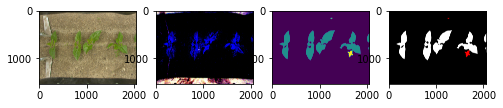

In [ ]:
  #Also visualization, used to check the correctness of patch extraction and reconstruction
  import tensorflow.keras.backend as K
  import matplotlib.pyplot as plt
  import time
  import sklearn
  import math

  
  original_img = Image.open(os.path.join(cwd,'Groupped_Images/Test_Dev/Images/Bipbip_haricot_im_00211.jpg'))
  #img = tf.keras.applications.vgg16.preprocess_input(np.asarray(original_img))
  img = preprocess(np.asarray(original_img))
  shape = original_img.size
  test_img_h = shape[1]
  test_img_w = shape[0]
  img_tiles = []
  predicted_tiles = []
  img_tiles = get_img_tiles(img)


  for index, image in enumerate(img_tiles):
        
    out_sigmoid = model.predict(x=tf.expand_dims(image, 0))
  
    #out_sigmoid = tf.image.resize(out_sigmoid, [test_img_h,test_img_w], method='nearest')
  
    predicted_class = tf.argmax(out_sigmoid, -1)

    predicted_class = predicted_class[0, ...]
    predicted_tiles.append(predicted_class)

  #tiles_tensor = tf.convert_to_tensor(predicted_tiles)

  rec_mask_pred = np.zeros (( math.ceil( test_img_h/512) * 512 , math.ceil( test_img_w /512 ) *512))
  rec_row = 0
  rec_col = 0

  for tile in predicted_tiles:
    rec_mask_pred[(rec_col*512):(rec_col+1)*512, (rec_row*512):(rec_row+1)*512] = tile
    if (test_img_w/512) <= (rec_row + 1):
      rec_row = 0
      rec_col += 1
    else:
      rec_row += 1

  vertical_border = (((math.ceil( test_img_h/512))) * 512 - test_img_h ) //2
  orizontal_border = (((math.ceil( test_img_w /512 ))) *512 - test_img_w ) //2

  rec_mask_pred= rec_mask_pred[vertical_border:test_img_h+vertical_border, orizontal_border:test_img_w+orizontal_border]
  # RLE encoding
  # crop
  rle_encoded_crop = rle_encode(rec_mask_pred == 1)
  # weed
  rle_encoded_weed = rle_encode(rec_mask_pred == 2)

  crop_mask = rle_decode(rle_encoded_crop, shape=[test_img_h,test_img_w])
  weed_mask = rle_decode(rle_encoded_weed, shape=[test_img_h,test_img_w])

  # Reconstruct original mask
  # weed_mask * 2 allows to convert ones into target 2 (weed label)
  reconstructed_mask = crop_mask + (weed_mask * 2)
  reconstructed_rgb_arr = np.zeros(shape=[test_img_h, test_img_w, 3])
  reconstructed_rgb_arr[np.where(reconstructed_mask == 1)] = [255, 255, 255]
  reconstructed_rgb_arr[np.where(reconstructed_mask == 2)] = [255, 0, 0]



  fig, ax = plt.subplots(1, 4, figsize=(8, 8))
  fig.show()
  ax[0].imshow(np.uint8(original_img))
  ax[1].imshow(np.uint8(img))
  ax[2].imshow(np.uint8(rec_mask_pred))
  ax[3].imshow(np.uint8(reconstructed_rgb_arr))

  fig.canvas.draw()
  time.sleep(1)
  
  